[Video](https://www.youtube.com/watch?v=lYeAc-5wBhQ)

# COGS 108 - Natural Disaster and Temperature Investigation

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

As time has progressed around the world it has been observed that temperatures have been increasing. Such increases in temperature are mainly attributed to climate change through evidence generated in various studies. In recent years as the rate of global warming has increased there has been an increase in the frequency of natural disasters occurring in various regions of the planet. The purpose of this study is to check for an association between increase in temperature, and incidence of the numerous types of natural disasters focusing on data from the United States since 1953.

In order to check for an association between Increase in Temperature, and Incidence of Natural Disasters we used datasets containing maximum daily temperature (in ºF) from 1953 onwards, and another dataset containing information about a natural disaster such as type, date of occurrence, station which recorded the disaster, state in which the natural disaster occurred, etc.

# Names
- Sarthak Yadav
- Ye Yint Win
- Jinxin Xiao
- Pramit Mazumder

<a id='research_question'></a>
# Research Question

How have rising temperatures affected the incidence of the various types of natural disasters in the US since 1953? Temperature increases over time are measured using the changes in maximum temperature over time, and incidence of the various types of natural disasters will be measured on the basis of frequency of each type of natural disaster in the US over time.

<a id='background'></a>

## Background & Prior Work

Climate change and global warming constitute a huge contemporary risk in relation to the disasters happening across United States. The temperature across the United States has been increasing steadily over the past few decades and with the increasing temperature comes to the possibility of wildfires, increased frequency of droughts and the formation of storms. Increased sea temperatures are also speculated to increase the rate of hurricane development, as well as altering rainfall patterns and accelerating habitat destruction [1].

According to the studies from U.S. temperature record 2009 assessment, U.S. annually averaged temperature has increased by 1.3°F to 1.9°F since 1895 which is not constant over time. In particular, temperatures generally rose until about 1940, declined slightly until about 1970, then increased rapidly thereafter (Figure 1.1 and 1.2). The year 2012 was the warmest on record for the contiguous United States [2].

![Figure 1](https://i.imgur.com/cUrb18S.png)

Figure 1.1: The colors on the map show temperature changes over the past 22 years (1991-2012) compared to the 1901-1960 average, and compared to the 1951-1980 average for Alaska and Hawai‘i. (Figure source: NOAA NCDC / CICS-NC).

![Figure 1.2](https://i.imgur.com/maSW5W4.png)

Figure 1.2: The bars on the graphs show the average temperature changes by decade for 1901-2012 (relative to the 1901-1960 average) for each region. The far-right bar in each graph (2000s decade) includes 2011 and 2012.

Our initial thinking process started with how climate change and global warming has significant impact on occurrences of natural disasters across the world and whether renewable energy pose a solution to the climate crisis. Afterwards, we narrowed it down to United States and observed the same issue from a different angle and broader level where extreme heat and steady increase in temperature might have been an underlying problem to see if it might be the confounding factor of recent natural disasters.

### References

1.	https://www.c2es.org/content/hurricanes-and-climate-change/
2.	https://nca2014.globalchange.gov/report/our-changing-climate/recent-us-temperature-trends

# Hypothesis


In our study we hypothesize that there exists a positive relationship between temperature, and the incidence of natural disasters, i.e., as temperature increases (attributed to climate change) there is an increase in the frequency of various different types of natural disasters. 
The reason behind considering such a hypothesis is that this is in line with current literature. One of the most commonly cited side effects of global warming is in the increase of natural disasters due to the fact that warmer climates create atmospheres that are able to collect, retain, and drop more water, so the already wet areas would become wetter, and the already dry areas would become drier. Thus, we should expect frequency and intensity of natural disasters such as droughts, cyclones, tornadoes, etc., will likely increase with an increase in temperature.

# Dataset(s)

* Temperature Data
    * Dataset Name: Compiled historical daily temperature and precipitation data for selected 210 U.S. cities.
    * Link to the dataset: https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488?file=32874371
    * Number of observations: 10,475,914
    * This dataset provides data regarding historical daily temperature, and precipitation data for selected 210 US cities. Daily minimum, and     maximum temperatures of the selected 210 cities was obtained through Applied Climate Information Systems (ACIS), and this data was developed by NOAA Northeast Regional Climate Center (NRCC). The 210 cities selected in this dataset are done based on cities which had most accurate data available on temperature levels at least from the year 1900, but even then this dataset has a reasonable portion of NaN values present. Our research will only require the usage of date, tmax, and fips (obtained from latitude, and longitude provided). 
    * Column Descriptions:
        * Date - Indicates the date at which the respective maximum temperature is observed.
        * tmax - Indicates the maximum temperature at the represented date.
        * lat- Denotes the latitude of location of temperature
        * lon- Denotes the longitude of location of temperature
        * fips (obtained from latitude & longitude data available in the dataset) - 5 digit FIPS county code; used to identify counties as well as county equivalents of the US.

<br>

* Natural Disaster Data
    * Dataset Name: US Natural Disaster Declarations – County-level data from the Federal Emergency Management Agency: 1953 - today
    * Link to the dataset: https://www.kaggle.com/headsortails/us-natural-disaster-declarations
    * Number of observations: 62771
    * This dataset is used to represent all federally declared natural disasters since 1953. The data in this dataset has been obtained from    records of The Federal Emergency Management Agency (FEMA). Our research will only require the usage of the columns state, declaration_date, fy_declared, incident_type, declaration_title, and fips. 
    * Column Descriptions:
        * state- US state, district, or territory
        * declaration_date- Date the natural disaster was declared. 
        * fy_declared- Fiscal year in which the natural disaster was declared. 
        * incident_type- Represents the type of natural disaster such as Flood, Hurricane, etc.
        * declaration_title- Title of the natural disaster.
        * fips- 5 digit FIPS county code; used to identify counties as well as county equivalents of the US.

# Setup

In [186]:
## Import packages
import pandas as pd
from os import listdir
from os.path import isfile, join
import urllib
import requests
import plotly.express as px
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Data Cleaning

Our process for cleaning this data was as follows:
* Checking for valid values in each individual dataset
    * Our Disaster dataset from Kaggle was clean already, so there was no work to do
    * The Carnegie Mellon dataset had over 1 million individual NaN values from dates where weather stations didn't have any data. These rows were dropped
    * Drop rows that are not of interest; the disaster dataset includes events that are not natural (including COVID), which we must drop.
* Matching values across datasets
    * Our disaster dataset only has values from 1953-2022, so we drop values before 1953 in the climate dataset
    * Add a FIPS column to the climate dataset to allow correlating location across both datasets. The climate dataset only has lattitude and longitude, so we must get an approximate FIPS from this
    * Standardize the date format used across both datasets

In [187]:
# Get all climate data file paths
temp_data_path = 'Temperature Data/'
temp_files = [f.strip('.csv') for f in listdir(temp_data_path) if isfile(join(temp_data_path, f)) and f.endswith('.csv') and f.startswith('US')]

In [188]:
# Load datasets into dataframes
df_disaster = pd.read_csv('Disaster Data/us_disaster_declarations.csv')
# Lean data by keeping only the columns we need
df_disaster= pd.DataFrame(df_disaster, columns=['state','declaration_date','fy_declared','incident_type','declaration_title','fips'])
# Create a list of dataframes that represent a weather station
df_temp_list = [pd.read_csv(temp_data_path + f + '.csv', usecols=['Date', 'tmax']) for f in temp_files]

## Dropping Invalid Values

In [189]:
# No invalid data, no work to do
df_disaster.isna().any()

state                False
declaration_date     False
fy_declared          False
incident_type        False
declaration_title    False
fips                 False
dtype: bool

In [190]:
# Find how many rows are missing across all dataframes
na_count = 0
for df in df_temp_list:
   na_count = na_count + df.isna().sum() 
na_count

Date         0
tmax    583903
dtype: int64

In [191]:
# Remove rows with missing data
for df in df_temp_list:
    df.dropna(inplace=True)

In [192]:
# Remove disaster rows with non natural disasters
incidents_to_keep = ['Coastal Storm', 'Drought', 'Earthquake', 'Fire', 'Flood', 'Hurricane', 'Mud/Landslide', 'Severe Ice Storm', 'Severe Storm(s)', 'Tornado', 'Tsunami', 'Typhoon', 'Volcano', 'Snow']
df_disaster = df_disaster[df_disaster['incident_type'].isin(incidents_to_keep)]

In [193]:
df_disaster.groupby('incident_type').count()

state  declaration_date  fy_declared  declaration_title  \
incident_type                                                               
Coastal Storm       635               635          635                635   
Drought            1292              1292         1292               1292   
Earthquake          227               227          227                227   
Fire               3566              3566         3566               3566   
Flood             10483             10483        10483              10483   
Hurricane         12490             12490        12490              12490   
Mud/Landslide        36                36           36                 36   
Severe Ice Storm   2942              2942         2942               2942   
Severe Storm(s)   17127             17127        17127              17127   
Snow               3664              3664         3664               3664   
Tornado            1571              1571         1571               1571   
Tsunami               9                 9            9                  9   
Typhoon             130               130          130                130   
Volcano              51                51           51                 51   

                   fips  
incident_type            
Coastal Storm       635  
Drought            1292  
Earthquake          227  
Fire               3566  
Flood             10483  
Hurricane         12490  
Mud/Landslide        36  
Severe Ice Storm   2942  
Severe Storm(s)   17127  
Snow               3664  
Tornado            1571  
Tsunami               9  
Typhoon             130  
Volcano              51

## Matching Values

### Match Date Ranges

In [194]:
# Drop the timestamp data from the ISO string to standardize the date format
df_disaster['declaration_date'] = df_disaster['declaration_date'].apply(lambda x: str(x)[:10])

In [195]:
# Convert the date columns to a datetime object
df_disaster['declaration_date'] = pd.to_datetime(df_disaster['declaration_date'])
for df in df_temp_list:
    df['Date'] = pd.to_datetime(df['Date'])

In [196]:
disaster_min_time = df_disaster['declaration_date'].min()
disaster_max_time = df_disaster['declaration_date'].max()
# all temp data has the same min and max time
temp_min_time = df_temp_list[0]['Date'].min()
temp_max_time = df_temp_list[0]['Date'].max()

In [197]:
# Get our time range
min_time = max(disaster_min_time, temp_min_time)
max_time = min(disaster_max_time, temp_max_time)

In [198]:
min_time

Timestamp('1953-05-02 00:00:00')

In [199]:
max_time

Timestamp('2021-12-26 00:00:00')

In [200]:
# Remove data outside of our time range
for i, df in enumerate(df_temp_list):
    df_temp_list[i] = df[(df['Date'] >= min_time) & (df['Date'] <= max_time)]
df_disaster = df_disaster[(df_disaster['declaration_date'] >= min_time) & (df_disaster['declaration_date'] <= max_time)]

### Add FIPS column to climate data

In [201]:
df_city_info = pd.read_csv('Temperature Data/city_info.csv')
def latLngToFIPS(lat, lon):
    #Encode parameters 
    params = urllib.parse.urlencode({'latitude': lat, 'longitude':lon, 'format':'json'})
    #Contruct request URL
    url = 'https://geo.fcc.gov/api/census/block/find?' + params
    #Get response from API
    response = requests.get(url)
    #Parse json in response
    data = response.json()
    return data['County']['FIPS']

In [202]:
keys_list = []
id_list = []
for i, df in enumerate(df_temp_list):
    city_info =df_city_info[df_city_info['ID'] == temp_files[i]].iloc[0]
    keys_list.append(latLngToFIPS(city_info['Lat'], city_info['Lon']))
    id_list.append(temp_files[i])

In [203]:
# Concatenate all the dataset files into one dataframe, only keeping the columns we need
df_temp = pd.concat(df_temp_list, axis=0, keys=keys_list)

# Add the fips for city info where the id is the same as the temp file
for i, id in enumerate(id_list):
    df_city_info.loc[df_city_info['ID'] == id, 'fips'] = keys_list[i]

In [204]:
df_city_info

Unnamed: 0        Name           ID      Lat       Lon  \
0             1      Lander  USW00024021  42.8153 -108.7261   
1             2      Lander  USW00024021  42.8153 -108.7261   
2             3    Cheyenne  USW00024018  41.1519 -104.8061   
3             4    Cheyenne  USW00024018  41.1519 -104.8061   
4             5      Wausau  USW00014897  44.9258  -89.6256   
..          ...         ...          ...      ...       ...   
456         457  Huntsville  USW00003856  34.6439  -86.7861   
457         458  Huntsville  USW00003856  34.6439  -86.7861   
458         459  Huntsville  USW00003856  34.6439  -86.7861   
459         460  Birmingham  USW00013876  33.5656  -86.7450   
460         461  Birmingham  USW00013876  33.5656  -86.7450   

                    Stn.Name  Stn.stDate  Stn.edDate   fips  
0                 LANDER WBO  1892-01-01  1946-05-28  56013  
1          LANDER HUNT FIELD  1946-05-29  2021-12-31  56013  
2               CHEYENNE WBO  1871-01-01  1935-08-31  56021  
3    CHEYENNE MUNICIPAL ARPT  1935-09-01  2021-12-31  56021  
4       Wausau Record Herald  1896-01-01  1941-12-31  55073  
..                       ...         ...         ...    ...  
456               HUNTSVILLE  1937-01-01  1954-07-14  01089  
457                  MADISON  1954-07-15  1958-08-31  01089  
458               HUNTSVILLE  1958-09-01  2021-12-31  01089  
459               BIRMINGHAM  1896-01-01  1903-12-31  01073  
460            BIRMINGHAM AP  1904-01-01  2021-12-31  01073  

[461 rows x 9 columns]

## Matching Disaster with Temperature

In [205]:
county_bounds = pd.read_csv('us-county-boundaries.csv', sep=';')

In [206]:
# Normalize lengths
county_bounds['STATEFP'] = county_bounds['STATEFP'].apply(lambda x: str(x).zfill(2))
county_bounds['COUNTYFP'] = county_bounds['COUNTYFP'].apply(lambda x: str(x).zfill(3))
# Create 5 digit fips from state and county fips
county_bounds['fips'] = county_bounds['STATEFP'].astype(str) + county_bounds['COUNTYFP'].astype(str)

In [207]:
# Converts a FIPS code to a lattitude and longitude
def FIPStoLatLng(fips):
    fips = str(fips)
    county_info = county_bounds[county_bounds['fips'] == fips]
    if county_info.shape[0] == 0:
        # If the county is not found, return the center of the state
        state_info = county_bounds[county_bounds['STATEFP'] == fips[0:2]]
        return state_info['INTPTLAT'].mean(), state_info['INTPTLON'].mean()
    return county_info.iloc[0][['INTPTLAT', 'INTPTLON']]

In [208]:
# Add longitude and lattitude to df_disaster
for i, row in df_disaster.iterrows():
    fips = row['fips']
    LatLng = FIPStoLatLng(fips)
    df_disaster.loc[i, 'lat'] = LatLng[0]
    df_disaster.loc[i, 'lon'] = LatLng[1]

In [209]:
df_disaster

state declaration_date  fy_declared incident_type  \
0        GA       1953-05-02         1953       Tornado   
1        TX       1953-05-15         1953       Tornado   
2        LA       1953-05-29         1953         Flood   
3        MI       1953-06-02         1953       Tornado   
4        MT       1953-06-06         1953         Flood   
...     ...              ...          ...           ...   
62727    AR       2021-12-23         2022       Tornado   
62728    AR       2021-12-23         2022       Tornado   
62729    AR       2021-12-23         2022       Tornado   
62730    AR       2021-12-23         2022       Tornado   
62731    AR       2021-12-23         2022       Tornado   

                 declaration_title   fips        lat         lon  
0                          Tornado  13000  32.806645  -83.576370  
1         Tornado & Heavy Rainfall  48000  31.658955  -98.652977  
2                            Flood  22000  31.087260  -91.821693  
3                          Tornado  26000  44.071662  -85.212606  
4                           Floods  30000  46.971127 -109.705596  
...                            ...    ...        ...         ...  
62727  Severe Storms And Tornadoes   5031  44.160205  -72.686161  
62728  Severe Storms And Tornadoes   5093  44.160205  -72.686161  
62729  Severe Storms And Tornadoes   5111  37.568143  -78.513110  
62730  Severe Storms And Tornadoes   5147  37.568143  -78.513110  
62731  Severe Storms And Tornadoes   5067  44.160205  -72.686161  

[54184 rows x 8 columns]

In [210]:
## Distance Calculations
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(city_df, lat, lon):
    # return the closest city to the given lat and lon
    distances = city_df.apply(lambda x: distance(x['Lat'], x['Lon'], lat, lon), axis=1)
    return city_df.iloc[distances.idxmin()]

print(closest(df_city_info, df_disaster.iloc[0]['lat'], df_disaster.iloc[0]['lon']))

Unnamed: 0            343
Name                Macon
ID            USW00003813
Lat               32.6847
Lon              -83.6528
Stn.Name            MACON
Stn.stDate     1893-01-01
Stn.edDate     1899-04-07
fips                13021
Name: 342, dtype: object


In [211]:
def getTemperatureDuringDisaster(row):
    # Get the temperature for the closest city to the disaster
    closest_city = closest(df_city_info, df_disaster.iloc[0]['lat'], df_disaster.iloc[0]['lon'])['fips']
    df_temps = df_temp[df_temp['Date'] == row['declaration_date']]['tmax'].reset_index()
    temp = df_temps[df_temps['level_0'] == closest_city]['tmax'].mean()
    return temp

In [ ]:
df_disaster['temp'] = df_disaster.apply(getTemperatureDuringDisaster, axis=1)

In [ ]:
df_disaster.to_csv('disaster_data.csv')
df_temp.to_csv('temp_data.csv')

## Final Cleaned Data

In [215]:
df_disaster.head()

Unnamed: 0 state declaration_date  fy_declared incident_type  \
0           0    GA       1953-05-02         1953       Tornado   
1           1    TX       1953-05-15         1953       Tornado   
2           2    LA       1953-05-29         1953         Flood   
3           3    MI       1953-06-02         1953       Tornado   
4           4    MT       1953-06-06         1953         Flood   

          declaration_title   fips        lat         lon  temp  
0                   Tornado  13000  32.806645  -83.576370  83.0  
1  Tornado & Heavy Rainfall  48000  31.658955  -98.652977  90.0  
2                     Flood  22000  31.087260  -91.821693  91.0  
3                   Tornado  26000  44.071662  -85.212606  86.0  
4                    Floods  30000  46.971127 -109.705596  92.0

In [216]:
df_temp

Date  tmax
06073 21670 1953-05-02  81.0
      21671 1953-05-03  88.0
      21672 1953-05-04  89.0
      21673 1953-05-05  92.0
      21674 1953-05-06  88.0
...                ...   ...
55113 46741 2021-12-22  16.2
      46742 2021-12-23  34.0
      46743 2021-12-24  42.1
      46744 2021-12-25  28.2
      46745 2021-12-26  29.1

[5113069 rows x 2 columns]

# EDA

In [214]:
## Load pre-saved clean data
df_disaster = pd.read_csv('disaster_data.csv')

# Part 1: Weather Dataset

### Overview

There's only one real factor in this dataset, so we'll focus on checking the distribution of the temperature

In [25]:
df_flattened = df_temp.reset_index()

<AxesSubplot:ylabel='tmax'>

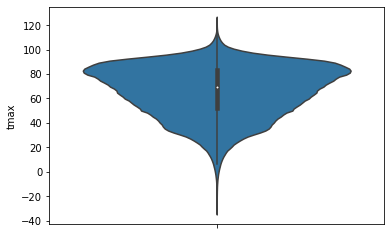

In [26]:
sns.violinplot(y=df_flattened['tmax'])

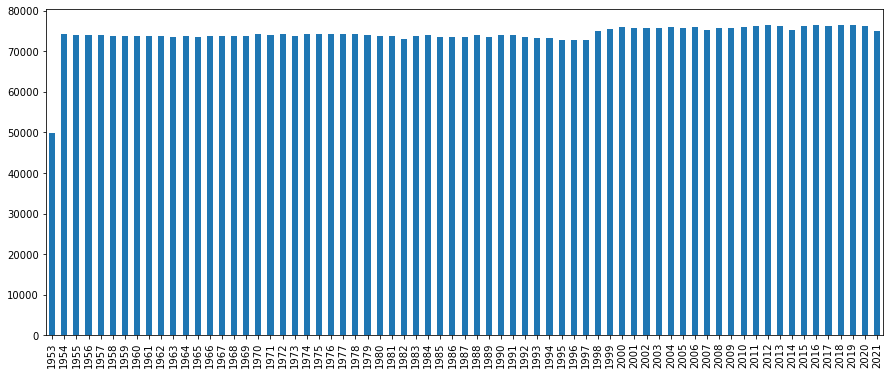

In [27]:
# histogram showing how much data from each year is present
df_flattened['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15, 6)

It looks like even after dropping the rows with invalid values, the distribution of data over time is still mostly uniform. 1953 has less data than every year after

The temperature data doesn't look quite gaussian, however it doesn't seem to have any outliers

### Visualizing our weather station locations

In [218]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

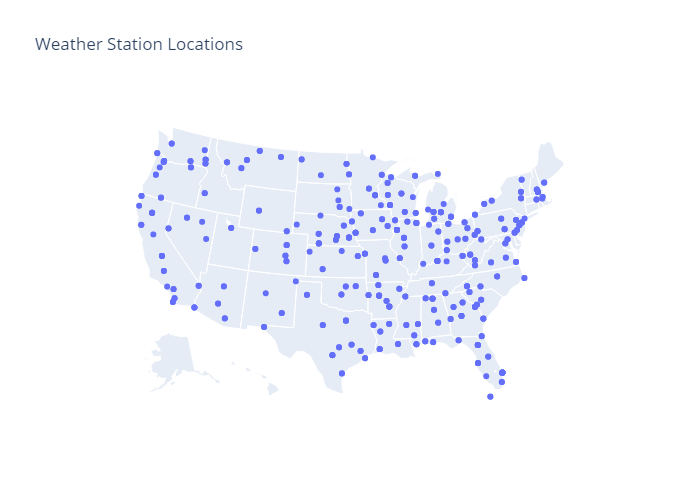

In [219]:
fig = px.scatter_geo(df_city_info, geojson= counties, 
                        lat= df_city_info['Lat'], lon= df_city_info['Lon'], 
                        hover_name= df_city_info['Name'], scope= 'usa',
                        title= 'Weather Station Locations')
fig.show("png")

It looks like we have a fairly good spread of weather stations across the U.S.

### Mean Temperature over time

<AxesSubplot:xlabel='Date', ylabel='tmax'>

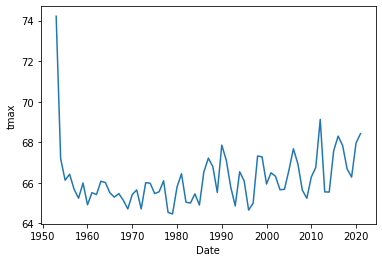

In [ ]:
# mean temp of the entire dataset over time
df_mean_temp = df_temp['tmax'].groupby(df_temp['Date'].dt.year).mean()
sns.lineplot(x=df_mean_temp.index, y=df_mean_temp)

We see a general upwards trend, with a major outlier in the earliest year of 1953. Let's try to find out why this is.

In [ ]:
df_mean_temp.head()

Date
1953    74.215013
1954    67.193828
1955    66.131985
1956    66.426289
1957    65.688672
Name: tmax, dtype: float64

In [ ]:
# get the range of dates present during the year of 1953
df_1953 = df_temp[df_temp['Date'].dt.year == 1953]
# get the earliest and latest dates
df_1953_min_date = df_1953['Date'].min()
df_1953_max_date = df_1953['Date'].max()
print(str(df_1953_min_date) + ' to ' + str(df_1953_max_date))

1953-05-02 00:00:00 to 1953-12-31 00:00:00


It looks like the 1953 data starts in May. This omits the earlier, colder winter and spring months, which possibly accounts for its skew in the warmer direction. In combination with the fact that it has less data than the rest of the years in the dataset, we should strongly consider dropping this year

### Mean temperature per weather station

This shows which regions are generally warmer than the rest of the U.S.

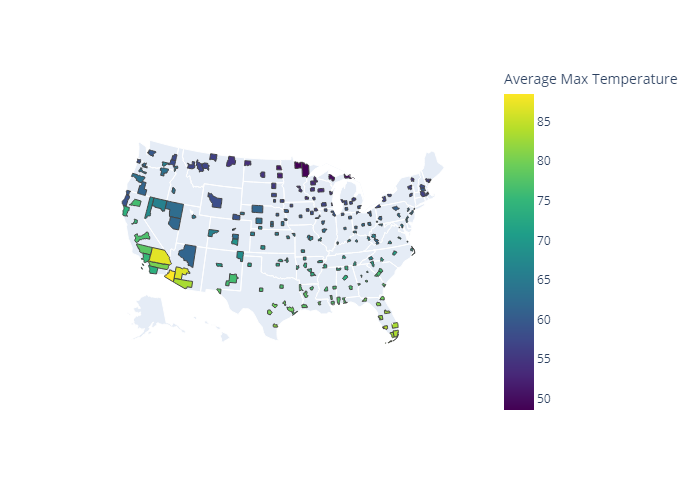

In [220]:
df_avg_tmax = df_temp.reset_index().groupby('level_0')['tmax'].mean()

df_new = df_avg_tmax.reset_index().rename(columns= {'level_0': 'fips', 'tmax': 'avg_tmax'})
fig = px.choropleth(df_new, geojson=counties, locations='fips', color='avg_tmax',
                           color_continuous_scale="Viridis",
                           scope="usa",
                           labels={'avg_tmax': 'Average Max Temperature'}
)
# show figure as image
fig.show("png")

This result is as expected.

# Part 2: Disaster Dataset

### Overview

Check the distributions and look for outliers in the disaster dataset

In [ ]:
df_disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54184 entries, 0 to 54183
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         54184 non-null  int64  
 1   state              54184 non-null  object 
 2   declaration_date   54184 non-null  object 
 3   fy_declared        54184 non-null  int64  
 4   incident_type      54184 non-null  object 
 5   declaration_title  54184 non-null  object 
 6   fips               54184 non-null  int64  
 7   lat                53184 non-null  float64
 8   lon                53184 non-null  float64
 9   temp               54183 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.1+ MB


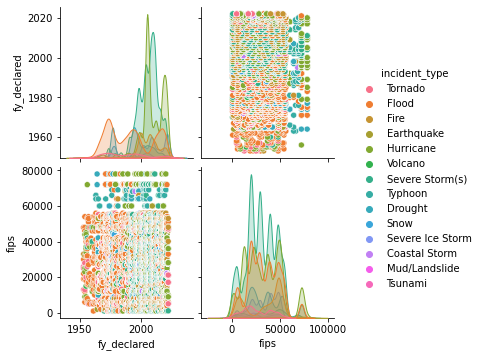

In [ ]:
sns.pairplot(df_disaster[['fy_declared', 'incident_type', 'fips']], hue='incident_type')

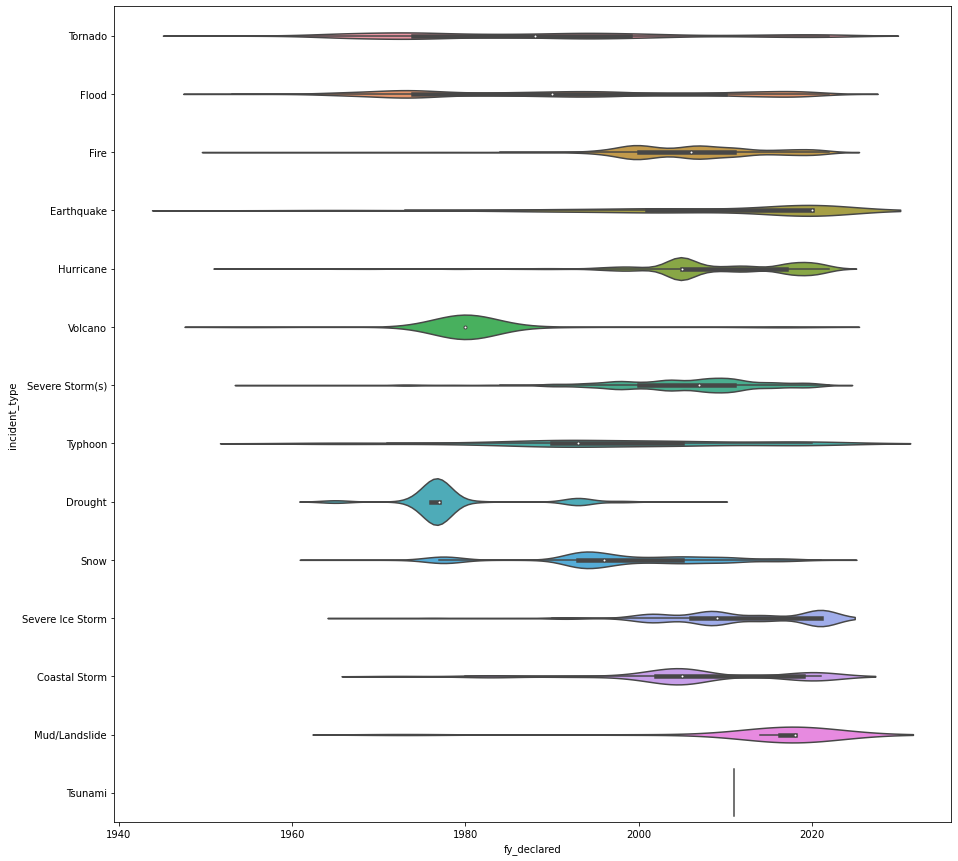

In [221]:
sns.violinplot(x='fy_declared', y='incident_type', data=df_disaster)
fig = plt.gcf()
fig.set_size_inches(15, 15)

### Distribution of Disasters

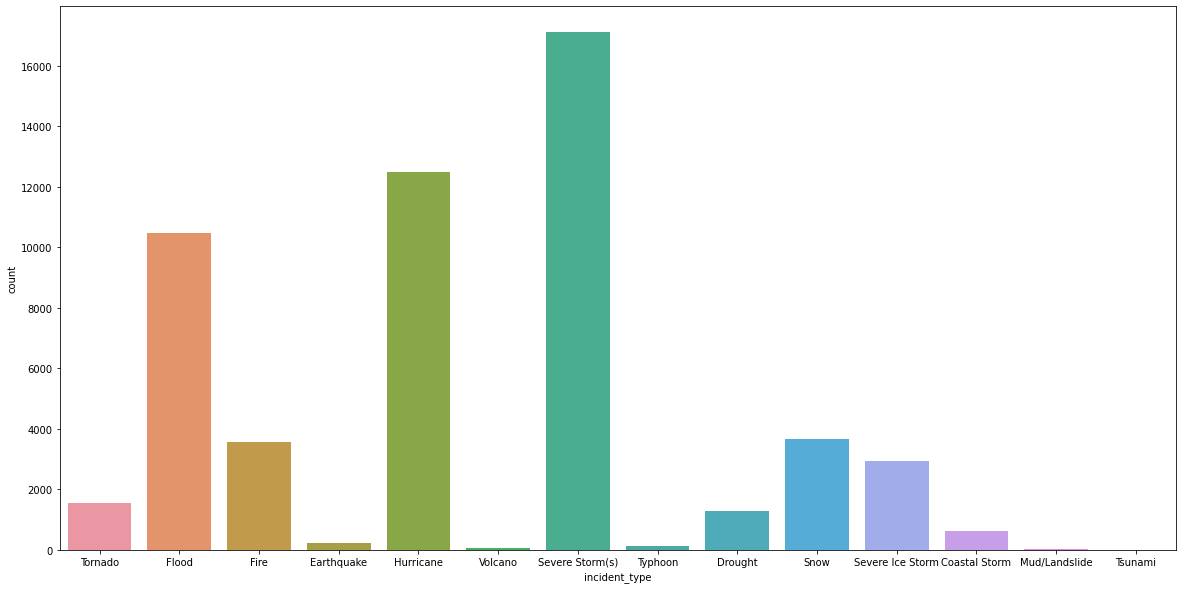

In [222]:
sns.countplot(x='incident_type', data=df_disaster)
fig1 = plt.gcf()
fig1.set_size_inches(20, 10)

Seems like most of our data are hurricanes, storms, or floods. It also looks like our distributions are visually free from outliers.

### Frequency of natural disasters over time

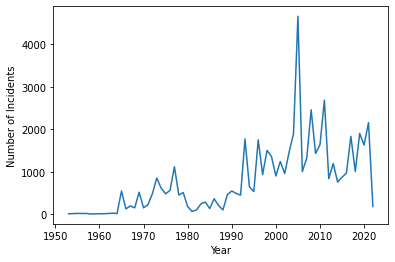

In [223]:
dfg = df_disaster.groupby(df_disaster['fy_declared']).count()
sns.lineplot(x=dfg.index, y=dfg['incident_type'])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

There seems to be a general upwards trend over time, with a few notable spikes. The year 2000 is remarkable in this regard.

### Visualizing disaster frequency and location over time

In [224]:
pio.renderers.default = 'notebook'

In [225]:
df_disaster_by_fips = pd.DataFrame(df_disaster.groupby(['fips', 'fy_declared']).size())

In [226]:
df_disaster_by_fips.reset_index(inplace=True)

In [227]:
df_disaster_by_fips = df_disaster_by_fips.rename(columns={0:'count'}).sort_values('fy_declared', ascending=True)

In [228]:
df_disaster_by_fips.head()

fips  fy_declared  count
15540  26000         1953      2
9207   19000         1953      1
21956  33000         1953      1
13574  22000         1953      1
32135  48000         1953      2

In [ ]:
# fig = px.scatter_geo(df_disaster_sample, geojson=counties, locations='fips', scope='usa', animation_frame='fy_declared', color='incident_type', hover_name='state')
fig = px.choropleth(df_disaster_by_fips, geojson=counties, locations='fips', scope='usa', animation_frame='fy_declared', color='count')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html('disaster_choropleth.html', include_plotlyjs="cdn", full_html=False)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

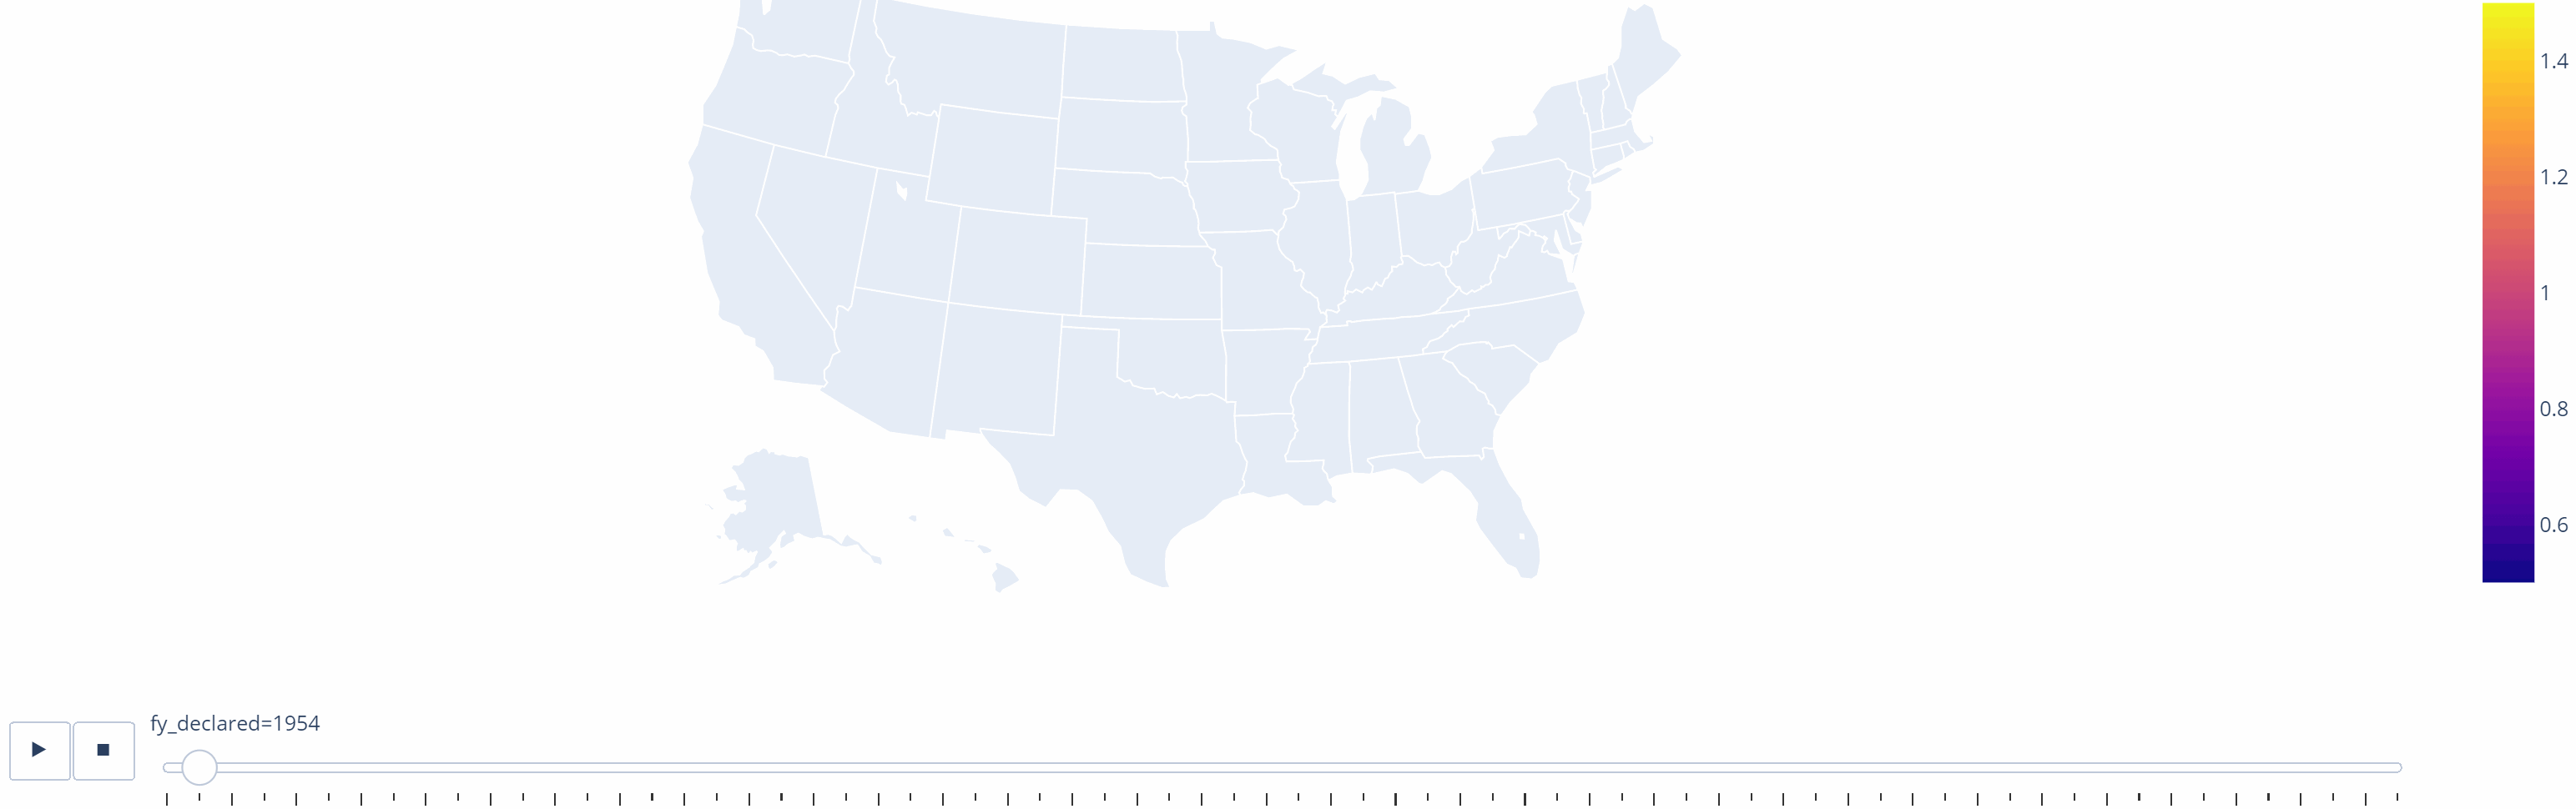

In [ ]:
from pathlib import Path
gifPath = Path("images/disaster_vis.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')


Alas, this plot is too large for github to version control it, but here's a GIF of it for viewing sake

It looks like our disasters mostly line up to locations where we have weather data, which is helpful

### Disaster risk by state

In [229]:
p = df_disaster[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p.rename(columns={'incident_type':'count'}, inplace=True)
p

state  count
50    TX   4579
28    MO   2463
21    LA   2308
20    KY   2308
41    OK   2224
52    VA   2178
12    GA   1943
32    NC   1788
10    FL   1785
30    MS   1734

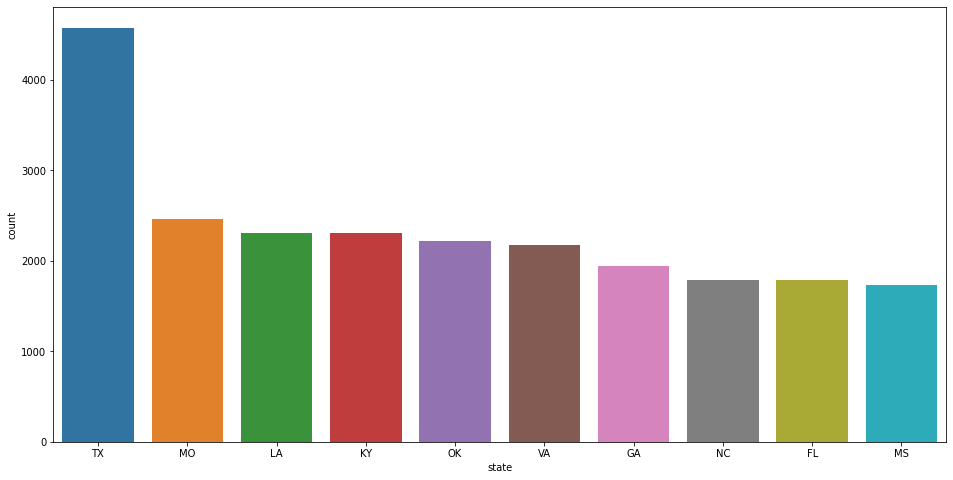

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x="state", y="count", data=p,);

Looks like Texas has been suffering the most

# Data Analysis & Results

The first step in our research is to find a correlation between the temperature and the frequency of natural disasters. This requires us to create a frequency metric. In order to account for the fact that certain temperatures are more frequent in general, we will divide by the frequency of the observed temperature to get a temperature-accounted disaster frequency.

In [230]:
temp_counts = df_temp.reset_index().groupby('tmax').count()['level_0']

In [ ]:
df_disaster_frequency_by_temp = df_disaster.groupby(['temp', 'incident_type']).size()

In [ ]:
df_freq = df_disaster_frequency_by_temp.reset_index()

In [ ]:
# Rename the '0' column to Count
df_freq.rename(columns={0:'count'}, inplace=True)

In [ ]:
df_freq['freq'] = df_freq.apply(lambda row: row['count']/temp_counts[row['temp']], axis=1)

In [ ]:
df_freq

temp     incident_type  count      freq
0     27.0  Severe Ice Storm      7  0.000358
1     29.0           Drought      2  0.000089
2     29.0              Fire      1  0.000044
3     31.0             Flood      1  0.000036
4     33.0           Drought     12  0.000349
..     ...               ...    ...       ...
557  103.0             Flood     19  0.002790
558  103.0   Severe Storm(s)      3  0.000440
559  104.0             Flood      3  0.000528
560  106.0              Fire      4  0.000996
561  108.0   Severe Storm(s)    143  0.053518

[562 rows x 4 columns]

## Overall Disaster Count vs Temperature

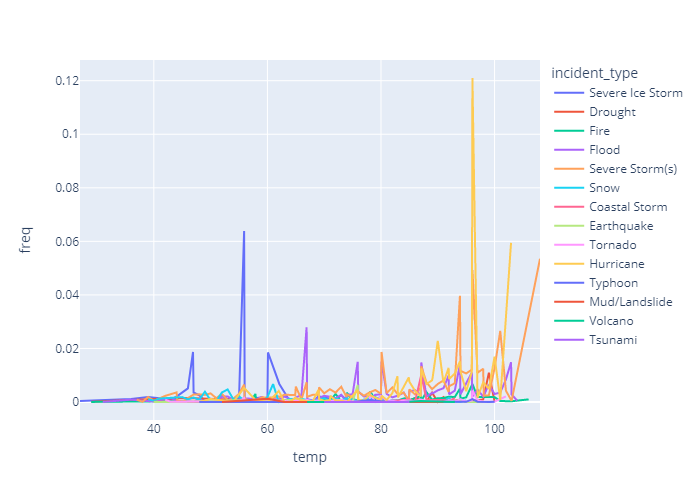

In [ ]:
# Plot all incidence types and their
# frequency by temperature
fig = px.line(df_freq, x='temp', y='freq', color='incident_type')
fig.show('png')

It looks like there is a slight positive correlation between the overall number of disasters and the temperature.

## Mean Temperature By Disaster

Text(0, 0.5, 'Average Temperature')

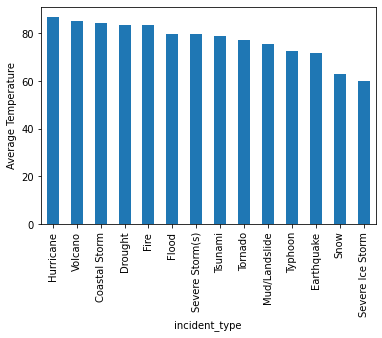

In [ ]:
df_disaster.groupby('incident_type').mean().sort_values(by='temp', ascending=False)['temp'].plot(kind='bar')
plt.ylabel('Average Temperature')

As expected, it looks like the mean temperature of hurricanes is higher than the mean temperature of other natural disasters. Disasters associated with ice and snow also seem to be lower than the mean temperature of other natural disasters.

## Linear Model

In [ ]:
X = df_freq['temp'].values
y = df_freq['freq'].values

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula='freq ~ temp', data=df_freq)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     25.72
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           5.37e-07
Time:                        21:22:18   Log-Likelihood:                 1940.7
No. Observations:                 562   AIC:                            -3877.
Df Residuals:                     560   BIC:                            -3869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0041      0.001     -2.946      0.0

eval_env: 1


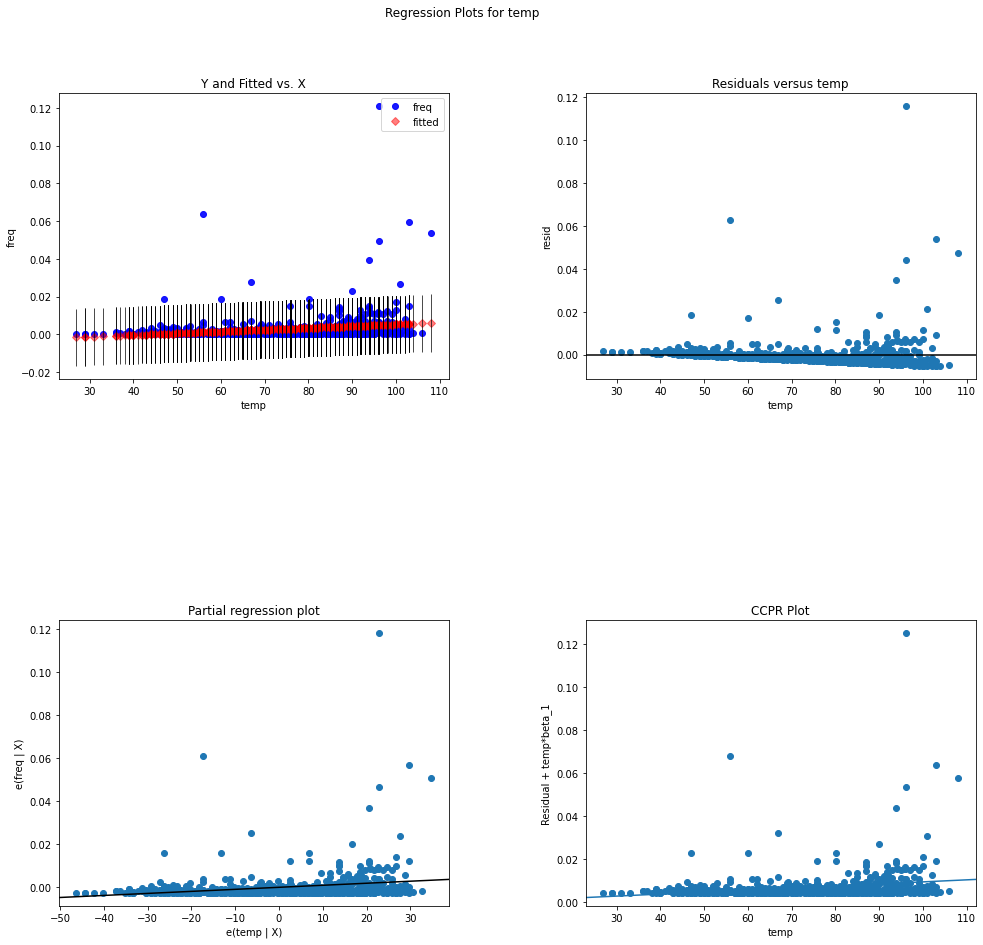

In [ ]:
# Plot the residuals
fig = sm.graphics.plot_regress_exog(model, 'temp')
fig.set_size_inches(15, 15)

In [ ]:
# Check if our model is significant
print(model.pvalues['temp'] < 0.05)

True


In [ ]:
# print slope and intercept
print(model.params)

Intercept   -0.004137
temp         0.000095
dtype: float64


In [ ]:
# correlation between temperature and frequency
df_freq['freq'].corr(df_freq['temp'])

0.20956334238751667

Our correlation coefficient is around 0.21, which indicates a weak positive relationship.

In [ ]:
# Normalize the values back to original scale
model_intercept = model.params[0] * df_freq['temp'].count()
model_slope = model.params[1]* df_freq['temp'].count()

In [ ]:
model_slope

0.05314511735792028

It looks like we have a statistically significant positive linear relationship between the mean temperature and the frequency of natural disasters that equates to around a 5% increase in frequency per degree of increase in temperature. This suggests that the temperature is a good predictor of the frequency of natural disasters. However, this is accounting for all natural disasters equally. It's possible that we have this correlation simply because our dataset has more natural disasters that occur in higher temperatures. From our countplot in EDA earlier, we know that severe storms and hurricanes are the most common disasters in the dataset.

In [ ]:
df_disaster_lowtemp = df_disaster[(df_disaster['temp']<70)].groupby('incident_type').count().sort_values(by='temp',ascending=False)['temp']
df_disaster_lowtemp

incident_type
Severe Storm(s)     3965
Snow                2436
Flood               2159
Severe Ice Storm    2006
Hurricane           1054
Tornado              395
Drought              240
Fire                 237
Earthquake           108
Coastal Storm         70
Typhoon               65
Mud/Landslide          7
Volcano                1
Name: temp, dtype: int64

In [ ]:
df_disaster_hightemp = df_disaster[(df_disaster['temp']>=80)].groupby('incident_type').count().sort_values(by='temp',ascending=False)['temp']
df_disaster_hightemp

incident_type
Hurricane           10653
Severe Storm(s)      9900
Flood                5997
Fire                 2318
Drought              1052
Tornado               852
Coastal Storm         523
Severe Ice Storm      351
Snow                  300
Typhoon                42
Volcano                41
Earthquake             26
Mud/Landslide           8
Tsunami                 6
Name: temp, dtype: int64

The above dataframe supports our argument that there are some natural disasters which tend to occur during summer, and others during winter which will cloud our regression analysis.

# Ethics & Privacy

In this project both the Disaster dataset was obtained from the Federal Emergency Management Agency, and the Temperature dataset was obtained from Applied Climate Information Systems (ACIS), and developed by NOAA Northeast Regional Climate Center, so both these datasets are public datasets. As these datasets are provided by government run agencies there wouldn’t be much of a bias present in the datasets, because all this data is reported information rather than surveys which would help prevent unnecessary bias such as response bias from creeping in. All our datasets are public datasets, so when we use them in this study we wouldn’t be violating ethics & privacy, i.e., the datasets are ethically obtained since these are public datasets. Our study of changes in incidence of natural disasters as there is an increase in temperature there wouldn’t be any data regarding individual citizens, so there won’t be any ethics, or privacy concerns found in research concerning individuals in our study. 

As our study involves observational data instead of an experiment, so to avoid any ethical concerns regarding incorrect interpretation of our visuals we’ve clearly stated in our hypothesis as well as in our research question that we are checking for an association between temperature increase, and incidence of natural disasters in the US instead of a causal relationship between the variables. If we incorrectly conclude that these variables form a causal relationship without conducting appropriate experiments then we may miss out on confounding variables such as greenhouse gas emissions which may be the reason behind such associations which could lead to potentially harmful consequences. 
Unfortunately it’s not possible for us to conduct an experiment to check for a causal relationship between temperature increase, and incidence of natural disasters, because if we do so then it would require increasing temperatures in a region, and checking whether there are more natural disasters which would potentially lead to increased loss of human life as well as wastage of federal and state resources indicating an ethical issue (as our treatment group). Thus, to avoid such ethical issues we conducted an observational study only.

# Conclusion & Discussion

Global warming and rising temperature do have certain level of influence and correlation on the frequency of natural disaster occurrences. By limiting the observation from Disaster and Temperature datasets from Year 1953, we see the upward trend of temperature rising steadily and so are the frequency of the natural disaster through our visualization. Therefore, to conclude with our analysis, there is indeed a positive relationship between the rising temperature and the incidence of natural disaster and our linear regression model further fortifies our hypothesis. 

The limitation we have faced during our analysis is that we had locations of natural disaster incidences across the United States, however, the temperature readings are from only 210 cities across the United States in which we cannot fully utilize the Disaster dataset and some of the temperature readings have missing values which limits our observation. And also, the temperature readings are from local weather stations which may or may not reflect the accurate temperature reading from the location of natural disaster incidence which in turns limiting our descriptive interpretations with respect to our initial research question. When we conducted our analysis, we did it based on the temperature related natural disasters in general instead of disasters that occurs at certain set of temperature which could potentially lead us to inaccurate conclusion. Our ideal analysis would be to find the correlation between the temperature and natural disaster across different continents but due to the availability of the datasets available, our analysis is limited to the United States only.

# Team Contributions

Pramit Mazumder
* Cleaned Temperature & Disaster Datasets, 
* Performed EDA on Temperature & Disaster Datasets 
* Conducted analysis in order to determine a relationship between rising Temperatures, and incidence of natural disasters in the US
* Linear Regression

Sarthak Yadav - 
* Cleaned Disaster Dataset
* Performed EDA on Temperature & Disaster Datasets
* Ethics & Privacy

Ye Yint Win
* Background & Prior Work
* Clean Disaster and Temperature Dataset 
* Geospatial Weather station visualization
* Frequency graphs

Jinxin Xiao 
* Analysis
* Linear Regression